#Project Overview
This project focuses on data cleaning, imputation, analysis, and visualization to provide valuable insights for a business stakeholder.
#Business Problem
The company is venturing into new industries to diversify its portfolio, specifically targeting the purchase and operation of aircraft for commercial and private use. However, there is a lack of knowledge about the potential risks associated with various aircraft. The objective is to identify which aircraft present the lowest risk for this new business endeavor and to translate these findings into actionable insights that can guide the head of the new aviation division in making informed purchasing decisions.
#The Data
The dataset in the data folder comes from the National Transportation Safety Board and contains aviation accident data from 1962 to 2023. It includes details about civil aviation accidents and select incidents in both the U.S. and international waters

In [ ]:
# import python packages for analyis, computation and visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
# Loading in the data with pd.read_csv
file_path = r"AviationData.csv"
df = pd.read_csv(file_path, encoding='latin1', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [ ]:
#checking the columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [ ]:
# display information on the aviation dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [ ]:
# Overview of statistics for numerical columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


The data above shows that

In [ ]:
#indicating the Countries
df['Country'].unique()

array(['United States', nan, 'GULF OF MEXICO', 'Puerto Rico',
       'ATLANTIC OCEAN', 'HIGH ISLAND', 'Bahamas', 'MISSING', 'Pakistan',
       'Angola', 'Germany', 'Korea, Republic Of', 'Martinique',
       'American Samoa', 'PACIFIC OCEAN', 'Canada', 'Bolivia', 'Mexico',
       'Dominica', 'Netherlands Antilles', 'Iceland', 'Greece', 'Guam',
       'Australia', 'CARIBBEAN SEA', 'West Indies', 'Japan',
       'Philippines', 'Venezuela', 'Bermuda', 'San Juan Islands',
       'Colombia', 'El Salvador', 'United Kingdom',
       'British Virgin Islands', 'Netherlands', 'Costa Rica',
       'Mozambique', 'Jamaica', 'Panama', 'Guyana', 'Norway', 'Hong Kong',
       'Portugal', 'Malaysia', 'Turks And Caicos Islands',
       'Northern Mariana Islands', 'Dominican Republic', 'Suriname',
       'Honduras', 'Congo', 'Belize', 'Guatemala', 'Anguilla', 'France',
       'St Vincent And The Grenadines', 'Haiti', 'Montserrat',
       'Papua New Guinea', 'Cayman Islands', 'Sweden', 'Taiwan',
       'Se

#Data Preparation
This section outlines the necessary modifications for preparing the data, including handling missing values, selecting relevant features, aggregating information, and ensuring data consistency. These steps are crucial for effective analysis and visualization, enabling accurate insights and informed decision-making in the subsequent phases of the project

In [ ]:
#checking on shape
df.shape

(88882, 31)

In [ ]:
#checking on the missing values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

,0
Schedule,76307
Air.carrier,72241
FAR.Description,56866
Aircraft.Category,56602
Longitude,54516
Latitude,54507
Airport.Code,38757
Airport.Name,36185
Broad.phase.of.flight,27165
Publication.Date,13771


In [ ]:
# count the number of NaN values in columns (%)
nan_counts = df.isna().sum()
nan_percentages = (nan_counts / len(df)) * 100
nan_percentages
#Sorting in Descending order
nan_percentages = nan_percentages.sort_values(ascending=False)
nan_percentages

,0
Schedule,85.845268
Air.carrier,81.271023
FAR.Description,63.974170
Aircraft.Category,63.677170
Longitude,61.330423
Latitude,61.320298
Airport.Code,43.601570
Airport.Name,40.708074
Broad.phase.of.flight,30.560587
Publication.Date,15.492356


In [ ]:
# I am going to drop columns that have roughly more than 25% of their data missing of their data missing
columns_to_drop = ['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description',
                   'Schedule', 'Air.carrier', 'Broad.phase.of.flight']

df_clean = df.drop(columns=columns_to_drop)

In [ ]:
# List of columns to delete
columns_to_delete = ['Engine.Type', 'Accident.Number', 'Amateur.Built', 'Publication.Date', 'Report.Status' 'Registration.Number']

# Check if the columns exist in the DataFrame, and drop them if they do
df_clean = df_clean.drop(columns=[col for col in columns_to_delete if col in df_clean.columns])

# Optional: print the remaining columns to verify the deletion
print("Remaining columns:", df_clean.columns)


Remaining columns: Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Number.of.Engines', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status'],
      dtype='object')


In [ ]:
df_clean.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Number.of.Engines', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status'],
      dtype='object')

In [ ]:
#deleting data before 1982, because there isn't enough information to analyzes previous years
df.sort_values(by='Event.Date').head(20)
df = df.drop(index=list(df[df['Event.Date']<'1982'].index.values.tolist())).reset_index(drop=True)

In [ ]:
#checking on categorical columns
df_clean.select_dtypes(include='object').columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Purpose.of.flight', 'Weather.Condition', 'Report.Status'],
      dtype='object')

In [ ]:
# Display number of nulls in each column
df_clean.isnull().sum()


,0
Event.Id,0
Investigation.Type,0
Event.Date,0
Location,52
Country,226
Injury.Severity,1000
Aircraft.damage,3194
Registration.Number,1382
Make,63
Model,92


In [ ]:
#checking on the location values
df_clean['Location'].value_counts()

,count
Location,
"ANCHORAGE, AK",434
"MIAMI, FL",200
"ALBUQUERQUE, NM",196
"HOUSTON, TX",193
"CHICAGO, IL",184
...,...
"Corona De Tucso, AZ",1
"Lithonia, GA",1
"BONANZA, OR",1


In [ ]:
#Checking on the Country
df_clean['Country'].value_counts()

,count
Country,
United States,38668
Bahamas,101
Puerto Rico,57
ATLANTIC OCEAN,54
Mexico,45
...,...
Senegal,1
Barbados,1
BLOCK 651A,1


In [ ]:
#category Values
df_clean['Purpose.of.flight'].value_counts()

,count
Purpose.of.flight,
Personal,22249
Unknown,4769
Instructional,4727
Business,2620
Aerial Application,2455
Positioning,536
Ferry,523
Other Work Use,505
Public Aircraft,340


In [ ]:
#Locating column values
df_clean['Purpose.of.flight'].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [ ]:
#creating a common name for unknown values
df_clean['Purpose.of.flight'].replace('Unknown', 'Other', inplace=True)
df['Weather.Condition'].replace(to_replace = ['Unk', 'UNK'], value = 'Unknown', inplace = True)
df['Engine.Type'].replace(to_replace = ['NONE', 'none', 'UNK'], value = 'Unknown', inplace = True)


In [ ]:
#Adding the Missing Values with mode
df_clean['Purpose.of.flight'].fillna(df_clean['Purpose.of.flight'].mode()[0], inplace=True)

In [ ]:
df_clean

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Number.of.Engines,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,1.0,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,1.0,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,1.0,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,1.0,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,PA-28-151,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN
88885,20221227106494,Accident,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,7ECA,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN
88886,20221227106497,Accident,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,Personal,0.0,0.0,0.0,1.0,VMC,NaN
88887,20221227106498,Accident,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,210N,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN


In [ ]:
# check missing values again
missing = df_clean.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

,0
Total.Serious.Injuries,12510
Total.Minor.Injuries,11933
Total.Fatal.Injuries,11401
Report.Status,6384
Number.of.Engines,6084
Total.Uninjured,5912
Weather.Condition,4492
Aircraft.damage,3194
Registration.Number,1382
Injury.Severity,1000


#Replacing the Missing Values
The code below converts several columns (*Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured, *and* Number.of.Engines*) to numeric data types, replacing invalid entries with *NaN* values.

By converting to numeric, the code ensures the values can be used for mathematical operations, like calculating sums or averages.

Replacing missing values with the mean avoids errors in analysis, preventing skewed results due to missing data while preserving the overall data distribution.

This step ensures the dataset is clean and ready for meaningful insight

In [ ]:
# Convert the columns to numeric, forcing invalid entries to NaN
df_clean['Total.Fatal.Injuries'] = pd.to_numeric(df_clean['Total.Fatal.Injuries'], errors='coerce')
df_clean['Total.Serious.Injuries'] = pd.to_numeric(df_clean['Total.Serious.Injuries'], errors='coerce')
df_clean['Total.Minor.Injuries'] = pd.to_numeric(df_clean['Total.Minor.Injuries'], errors='coerce')
df_clean['Total.Uninjured'] = pd.to_numeric(df_clean['Total.Uninjured'], errors='coerce')
df_clean['Number.of.Engines'] = pd.to_numeric(df_clean['Number.of.Engines'], errors='coerce')

# Now replace missing values with the mean
df_clean['Total.Fatal.Injuries'].fillna(df_clean['Total.Fatal.Injuries'].mean(), inplace=True)
df_clean['Total.Serious.Injuries'].fillna(df_clean['Total.Serious.Injuries'].mean(), inplace=True)
df_clean['Total.Minor.Injuries'].fillna(df_clean['Total.Minor.Injuries'].mean(), inplace=True)
df_clean['Total.Uninjured'].fillna(df_clean['Total.Uninjured'].mean(), inplace=True)
df_clean['Number.of.Engines'].fillna(df_clean['Number.of.Engines'].mean(), inplace=True)

In [ ]:
#Only keeping USA country
df_clean = df_clean[df_clean['Country'] == 'United States']

In [ ]:
#Drop Report.Status, Purpose.of.flight
df_clean = df_clean.drop(['Report.Status', 'Purpose.of.flight'], axis=1)

In [ ]:
# filled weather condition nans with unknown
df_clean['Weather.Condition'].fillna('Unknown', inplace=True)

In [ ]:
# replace aircraft damage nans with unknown
df_clean['Aircraft.damage'].fillna('Unknown', inplace=True)

In [ ]:
#Drop Registration.Number
df_clean.drop(['Registration.Number'], axis=1, inplace=True)

In [ ]:
## fill nans with non fatal within the Injury.Severity
df_clean['Injury.Severity'].fillna('Non-Fatal', inplace=True)

In [ ]:
# drop nulls in Model and Make column
df_clean.dropna(subset=['Model'], inplace=True)
df_clean.dropna(subset=['Make'], inplace=True)

In [ ]:
#Filling missing values with an empty string on the location
df_clean['Location'].fillna('', inplace=True)

In [ ]:
#Checking on the total Affected Passengers
# Calculate total affected passengers (sum of all injuries and uninjured)
df_clean['Total_Affected_Passengers'] = (df_clean['Total.Fatal.Injuries'].fillna(0) +
                                         df_clean['Total.Serious.Injuries'].fillna(0) +
                                         df_clean['Total.Minor.Injuries'].fillna(0) +
                                         df_clean['Total.Uninjured'].fillna(0))

# Display the first few rows to check
df_clean[['Make', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Total_Affected_Passengers']].head()

,Make,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total_Affected_Passengers
0,Stinson,2.0,0.000000,0.000000,0.000000,2.000000
1,Piper,4.0,0.000000,0.000000,0.000000,4.000000
2,Cessna,3.0,0.213628,0.343516,4.117933,7.675077
3,Rockwell,2.0,0.000000,0.000000,0.000000,2.000000
4,Cessna,1.0,2.000000,0.343516,0.000000,3.343516


In [ ]:
# check missing values again
missing = df_clean.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

,0


In [ ]:
#checking on duplicates
df_clean.duplicated().sum()


41

In [ ]:
#Dropping the duplicates
df_clean.drop_duplicates(inplace=True)

In [ ]:
#checking on duplicates again
df_clean.duplicated().sum()


0

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82156 entries, 0 to 88888
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Event.Id                   82156 non-null  object 
 1   Investigation.Type         82156 non-null  object 
 2   Event.Date                 82156 non-null  object 
 3   Location                   82156 non-null  object 
 4   Country                    82156 non-null  object 
 5   Injury.Severity            82156 non-null  object 
 6   Aircraft.damage            82156 non-null  object 
 7   Make                       82156 non-null  object 
 8   Model                      82156 non-null  object 
 9   Number.of.Engines          82156 non-null  float64
 10  Total.Fatal.Injuries       82156 non-null  float64
 11  Total.Serious.Injuries     82156 non-null  float64
 12  Total.Minor.Injuries       82156 non-null  float64
 13  Total.Uninjured            82156 non-null  float64


#Saving the Cleaned Data to a CSV File
The cleaned data will be saved and named as df_clean

In [ ]:
#Save the cleaned Dataframe to a csv file without including the index
df_clean.to_csv('df_clean.csv', index=False)

#Ensure the file has been saved
print("Cleaned data saved to 'df_clean.csv'")

#load the cleaned data from the CSV file into a new Dataframe
df_clean = pd.read_csv('df_clean.csv')
#display the first few rows of the DataFrame
df_clean.head()

Cleaned data saved to 'df_clean.csv'


,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Total_Affected_Passengers
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,1.000000,2.0,0.000000,0.000000,0.00000,UNK,2.000000
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,1.000000,4.0,0.000000,0.000000,0.00000,UNK,4.000000
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,1.000000,3.0,0.279881,0.357061,5.32544,IMC,8.962381
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,1.000000,2.0,0.000000,0.000000,0.00000,IMC,2.000000
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,1.146585,1.0,2.000000,0.357061,0.00000,VMC,3.357061


In [ ]:
#importing the data from colab to downloadable file
from google.colab import files

# Saving the cleaned data to a CSV file
df_clean.to_csv('cleaned_data.csv', index=False)

# Downloading the file
files.download('cleaned_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Provide a table that shows the top ten Make with highest Accidents
# Group by 'Make' and count the number of accidents (i.e., occurrences of each make)
top_10_makes_accidents = df_clean['Make'].value_counts().head(10)

# Convert the series to a DataFrame for better presentation
top_10_makes_accidents_df = top_10_makes_accidents.reset_index()
top_10_makes_accidents_df.columns = ['Make', 'Accident_Count']

# Display the table
print(top_10_makes_accidents_df)


      Make  Accident_Count
0   Cessna           21563
1    Piper           11659
2   CESSNA            4279
3    Beech            4167
4    PIPER            2507
5     Bell            1881
6   Boeing            1156
7   Mooney            1074
8  Grumman            1073
9    BEECH             892


#Data Visualization
The objective is to provide recommendations about which aircraft models would be most profitable, with the least potential risk on investing.
This section emphasizes the creation of visual representations to make complex data more accessible. Using charts and graphs such as bar charts and line graphs, the visualizations help communicate insights clearly to a non-technical audience.

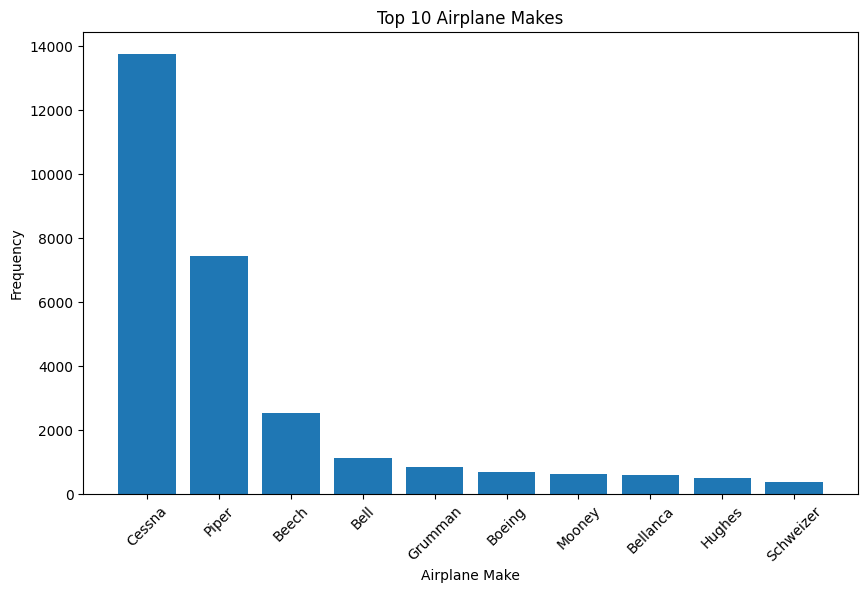

In [ ]:
#provide the top 10 Airplane makes based on their frequency
top_10_makes = df_clean['Make'].value_counts()

#filtering the 10 planes with highest count
top_10_makes = top_10_makes.head(10)

#Ploting a Histogram
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_10_makes.index, top_10_makes.values)
ax.set_xlabel('Airplane Make')
ax.set_ylabel('Frequency')
ax.set_title('Top 10 Airplane Makes')
plt.xticks(rotation=45)
plt.show()


#Analyzing Airplane Vs Accidents
The graph below displays the top 10 airplane makes ranked by the number of accidents that occurred. Each bar represents an aircraft make, with the height of the bar indicating the total number of accidents. This visual comparison helps identify which airplane manufacturers are associated with higher accident frequencies, offering valuable insights into potential risks for the company when selecting aircraft for purchase. By focusing on the top 10 makes, the graph highlights key trends in accident data, assisting decision-makers in evaluating safety records and guiding strategic investments in aviation.


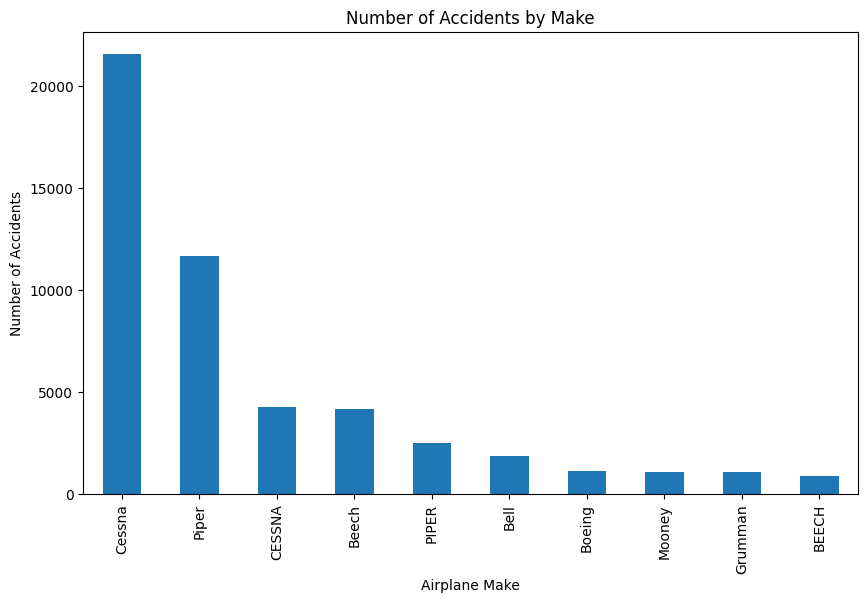

In [ ]:
#analyzing the top 10 make of the Airplane based on Accidents occured
top_10_makes = df_clean['Make'].value_counts()
top_10_makes = top_10_makes.head(10)
top_10_makes.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Airplane Make')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Make')
plt.show()


# Comparing Airplane Make and Injuries
The graph below illustrates the total number of injuries (fatal, serious, and minor) grouped by airplane make. Each bar in the graph represents a specific airplane manufacturer, while the bar segments correspond to different types of injuries: fatal, serious, and minor. This visual comparison provides a clear breakdown of how different airplane makes are associated with varying levels of injury severity

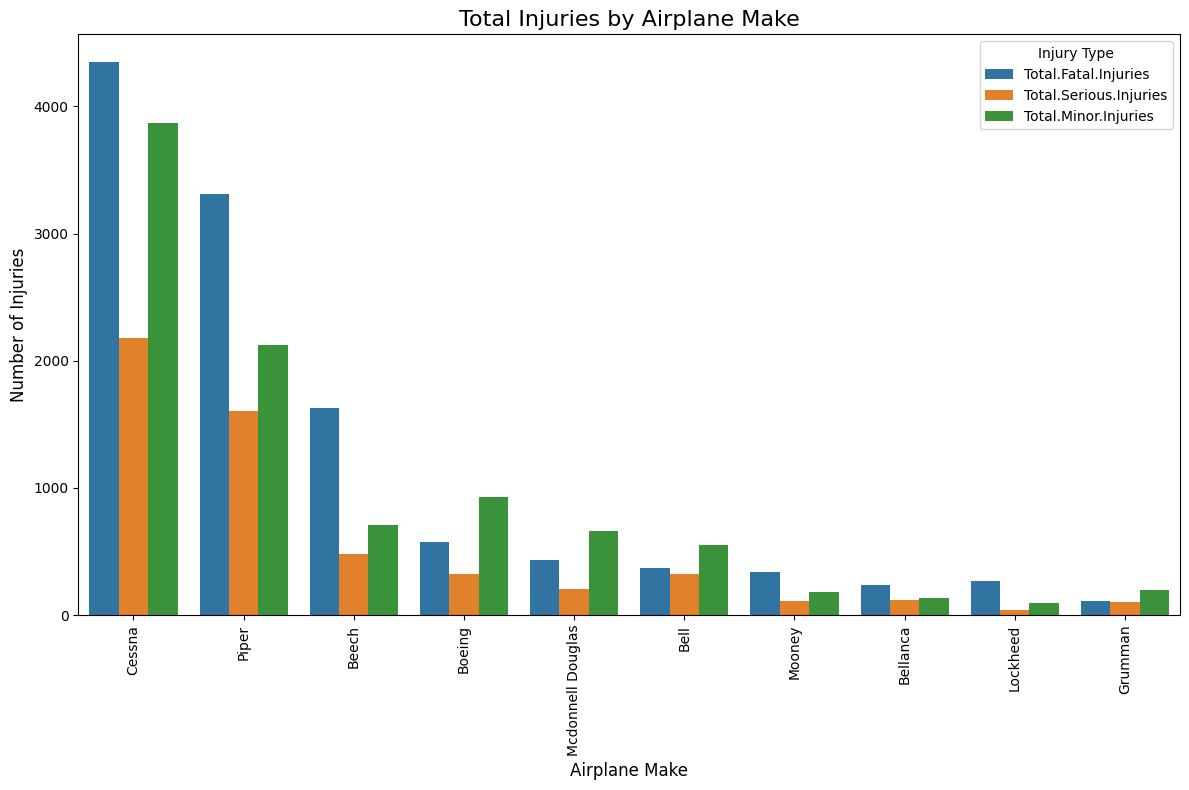

In [ ]:
#Make and Injuries
# Group by 'Make' and sum the injuries
injuries_by_make = df_clean.groupby('Make')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum().reset_index()

# Filter to top 10 makes based on total injuries
injuries_by_make['Total.Injuries'] = injuries_by_make[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum(axis=1)
top_10_makes_injuries = injuries_by_make.nlargest(10, 'Total.Injuries')

# Melt the dataframe to have 'Injury Type' in one column
melted_injuries = top_10_makes_injuries.melt(id_vars='Make', value_vars=['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries'],
                                             var_name='Injury Type', value_name='Injury Count')

# Plotting using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_injuries, x='Make', y='Injury Count', hue='Injury Type')

# Add labels and title
plt.title('Total Injuries by Airplane Make', fontsize=16)
plt.xlabel('Airplane Make', fontsize=12)
plt.ylabel('Number of Injuries', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the plot
plt.show()


#Weather and Incidences
The plot below that compares the number of accidents and incidents under different weather conditions provides valuable insights. Understanding this relationship is crucial for identifying weather-related risks and improving safety measures in aviation operations



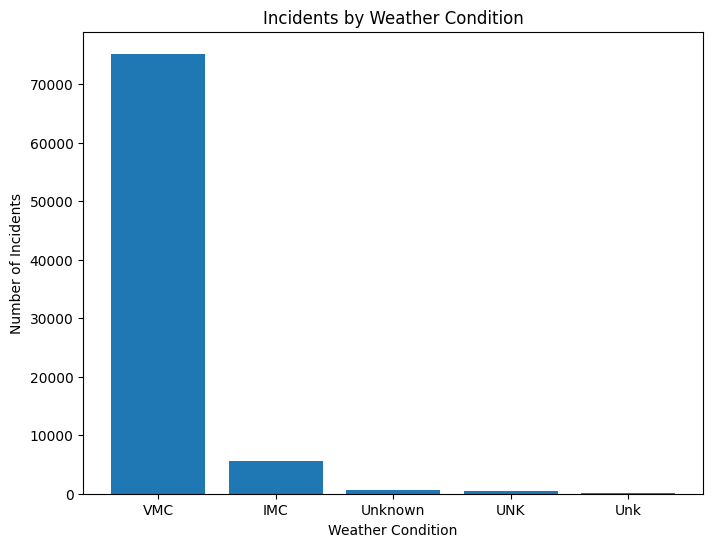

In [ ]:
#A plot showing the influence of Weather and Incidences
# Count of incidents based on weather conditions
weather_counts = df_clean['Weather.Condition'].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(weather_counts.index, weather_counts.values)

# Labels
ax.set_xlabel('Weather Condition')
ax.set_ylabel('Number of Incidents')
ax.set_title('Incidents by Weather Condition')

plt.show()


#Total Affected Passengers by Airplane Mak
The graph below is on Total Affected Passengers by Airplane Make. It reveals the overall impact of each airplane manufacturer on passenger safety. Total Affected Passengers were achieved by summing fatal, serious, minor injuries, and uninjured individuals.
It provides a clear comparison of how different makes contribute to total incident involvement, highlighting potential safety concerns across manufacturers.

<ipython-input-45-f8c202925100>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=make_total_affected.index, y=make_total_affected.values, palette='viridis')


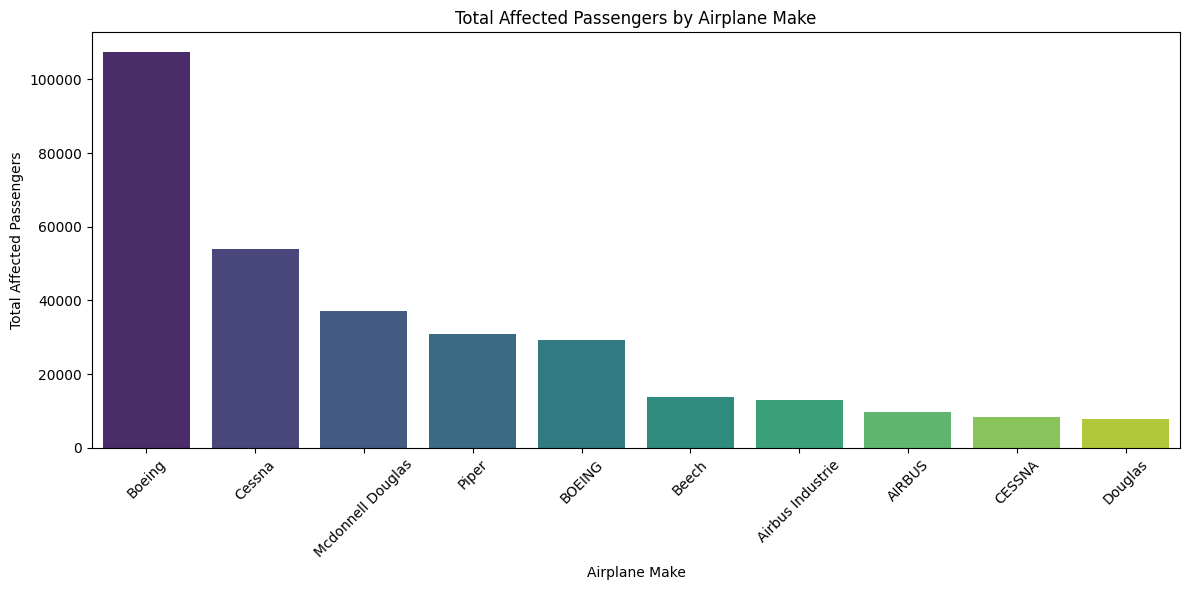

In [ ]:
# Calculating total affected passengers (if not already calculated)
df_clean['Total_Affected_Passengers'] = (df_clean['Total.Fatal.Injuries'].fillna(0) +
                                         df_clean['Total.Serious.Injuries'].fillna(0) +
                                         df_clean['Total.Minor.Injuries'].fillna(0) +
                                         df_clean['Total.Uninjured'].fillna(0))

# Group by 'Make' and sum 'Total_Affected_Passengers'
make_total_affected = df_clean.groupby('Make')['Total_Affected_Passengers'].sum().sort_values(ascending=False).head(10)

# Create a Seaborn barplot comparing Total_Affected_Passengers by Make
plt.figure(figsize=(12, 6))
sns.barplot(x=make_total_affected.index, y=make_total_affected.values, palette='viridis')

# Add labels and title
plt.xlabel('Airplane Make')
plt.ylabel('Total Affected Passengers')
plt.title('Total Affected Passengers by Airplane Make')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Create 'Total_Affected_Passengers' as the sum of all injury columns
df_clean['Total_Affected_Passengers'] = df_clean['Total.Fatal.Injuries'].fillna(0) + \
                                        df_clean['Total.Serious.Injuries'].fillna(0) + \
                                        df_clean['Total.Minor.Injuries'].fillna(0) + \
                                        df_clean['Total.Uninjured'].fillna(0)


#Top 10 Airplane Makes: Total Affected Passengers vs Total Incident
The histogram below shows a clear comparison between incidents and affected passengers for each of the top 10 airplane makes. The chart emphasizes how different aircraft manufacturers vary in terms of passenger safety, aiding in risk assessment and decision-making for future investment

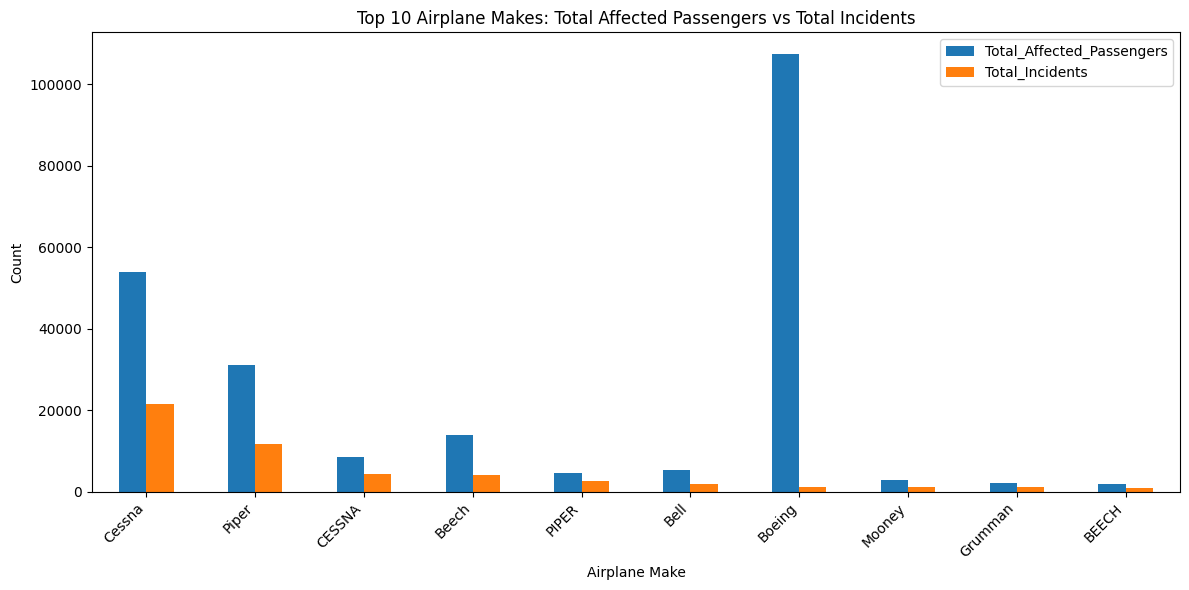

In [ ]:

# Group by 'Make' and calculate both 'Total_Affected_Passengers' and 'Total_Incidents'
df_clean['Total_Incidents'] = df_clean['Investigation.Type'].apply(lambda x: 1 if x in ['Accident', 'Incident'] else 0)

make_stats = df_clean.groupby('Make').agg(
    Total_Affected_Passengers=('Total_Affected_Passengers', 'sum'),
    Total_Incidents=('Total_Incidents', 'sum')
)

# Sort by total incidents and affected passengers and choose the top 10 makes
top_10_makes_stats = make_stats.sort_values(by='Total_Incidents', ascending=False).head(10)

# Plotting a bar chart for the top 10 airplane makes based on Total Affected Passengers
plt.figure(figsize=(12, 6))
top_10_makes_stats[['Total_Affected_Passengers', 'Total_Incidents']].plot(kind='bar', ax=plt.gca())

# Add labels and title
plt.xlabel('Airplane Make')
plt.ylabel('Count')
plt.title('Top 10 Airplane Makes: Total Affected Passengers vs Total Incidents')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


#Summary

This project analyzes aviation accident data to identify aircraft with the lowest risk, helping your company make informed decisions for expanding into the aviation industry.

Cessna, Piper, Beech, Boeing, Bell, Mooney, Bellanca, Lockheed, and Grumman had the highest number of accidents/injuries, with small private aircraft being most affected. Accidents often occurred under VMC and IMC weather conditions.

##Recommendations:
Prioritize low-risk makes with fewer accidents, monitor weather-related risks, and invest in Boeing aircraft along with a high-quality maintenance team



```
# This is formatted as code
```

